<a href="https://colab.research.google.com/github/Ho1yShif/cgi_flood_prediction_mitigation/blob/main/Prophet_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/drive')
import numpy as np
import pandas as pd

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/drive/My Drive/2022 Fall NJBDA Externship Project/Colab Notebooks/Daily_Max_Vals.txt")

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt # Visualization
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from datetime import date

from itertools import product

np.random.seed(0)
sns.set()

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head(5)

,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
0,2007-10-01,RA101,2.40,23.9,0.0,0.0
1,2007-10-02,RA101,2.39,23.2,0.0,0.0
2,2007-10-03,RA101,2.39,23.2,0.0,0.0
3,2007-10-04,RA101,2.39,23.2,0.0,0.0
4,2007-10-05,RA101,2.42,25.2,0.0,0.0


In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             5477 non-null   datetime64[ns]
 1   stid             5477 non-null   object        
 2   gauge            5477 non-null   float64       
 3   discharge        5477 non-null   float64       
 4   rainfall_inches  5477 non-null   float64       
 5   rainfall_ft      5477 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 256.9+ KB


In [ ]:
train_size = int(0.90 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'gauge']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

4929 548


In [ ]:
import prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

#from fbprophet import Prophet
from prophet import Prophet

In [ ]:
univariate_df

,ds,y
0,2007-10-01,2.40
1,2007-10-02,2.39
2,2007-10-03,2.39
3,2007-10-04,2.39
4,2007-10-05,2.42
...,...,...
5472,2022-10-18,3.35
5473,2022-10-19,2.92
5474,2022-10-20,2.85
5475,2022-10-21,2.77


In [ ]:
m = Prophet()
m.fit(univariate_df)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/u3655u3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/wdc7tn4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67586', 'data', 'file=/tmp/tmpxf5j5kkv/u3655u3d.json', 'init=/tmp/tmpxf5j5kkv/wdc7tn4u.json', 'output', 'file=/tmp/tmpxf5j5kkv/prophet_modelnnvfro_2/prophet_model-20221207154003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5827,2023-10-08,2.763606,1.591851,3.953351
5828,2023-10-09,2.747987,1.612873,3.977196
5829,2023-10-10,2.746303,1.627656,3.963397
5830,2023-10-11,2.777315,1.653522,4.005869
5831,2023-10-12,2.802421,1.729457,4.106005
5832,2023-10-13,2.816871,1.576909,4.035227
5833,2023-10-14,2.782281,1.568344,3.967958
5834,2023-10-15,2.807995,1.535869,3.946517
5835,2023-10-16,2.796664,1.508644,3.962446
5836,2023-10-17,2.799526,1.532078,3.976030


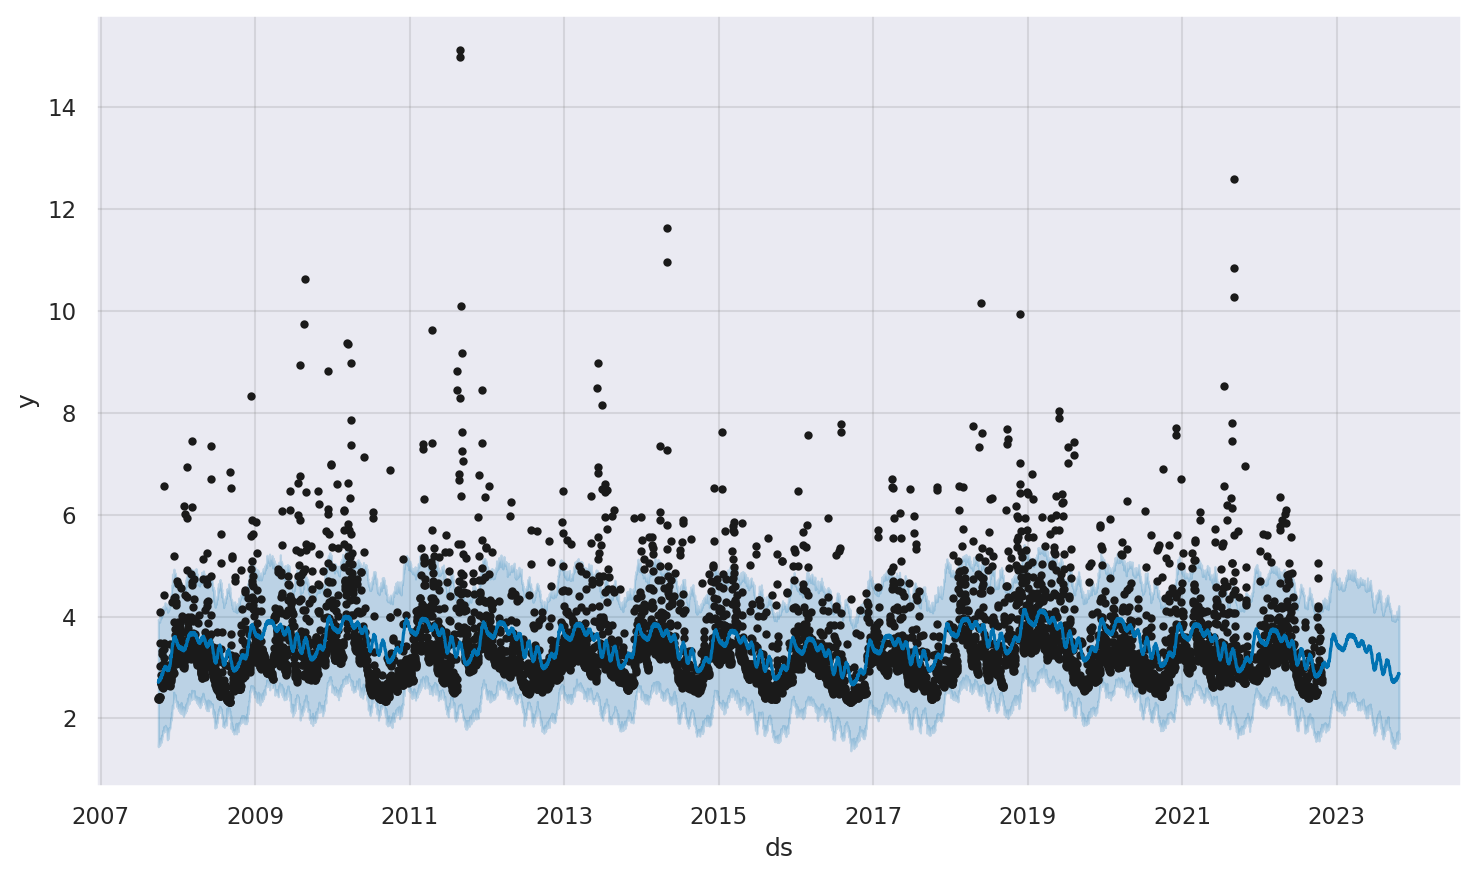

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_valid, y_pred['yhat'])
R_squared

0.932711732849563

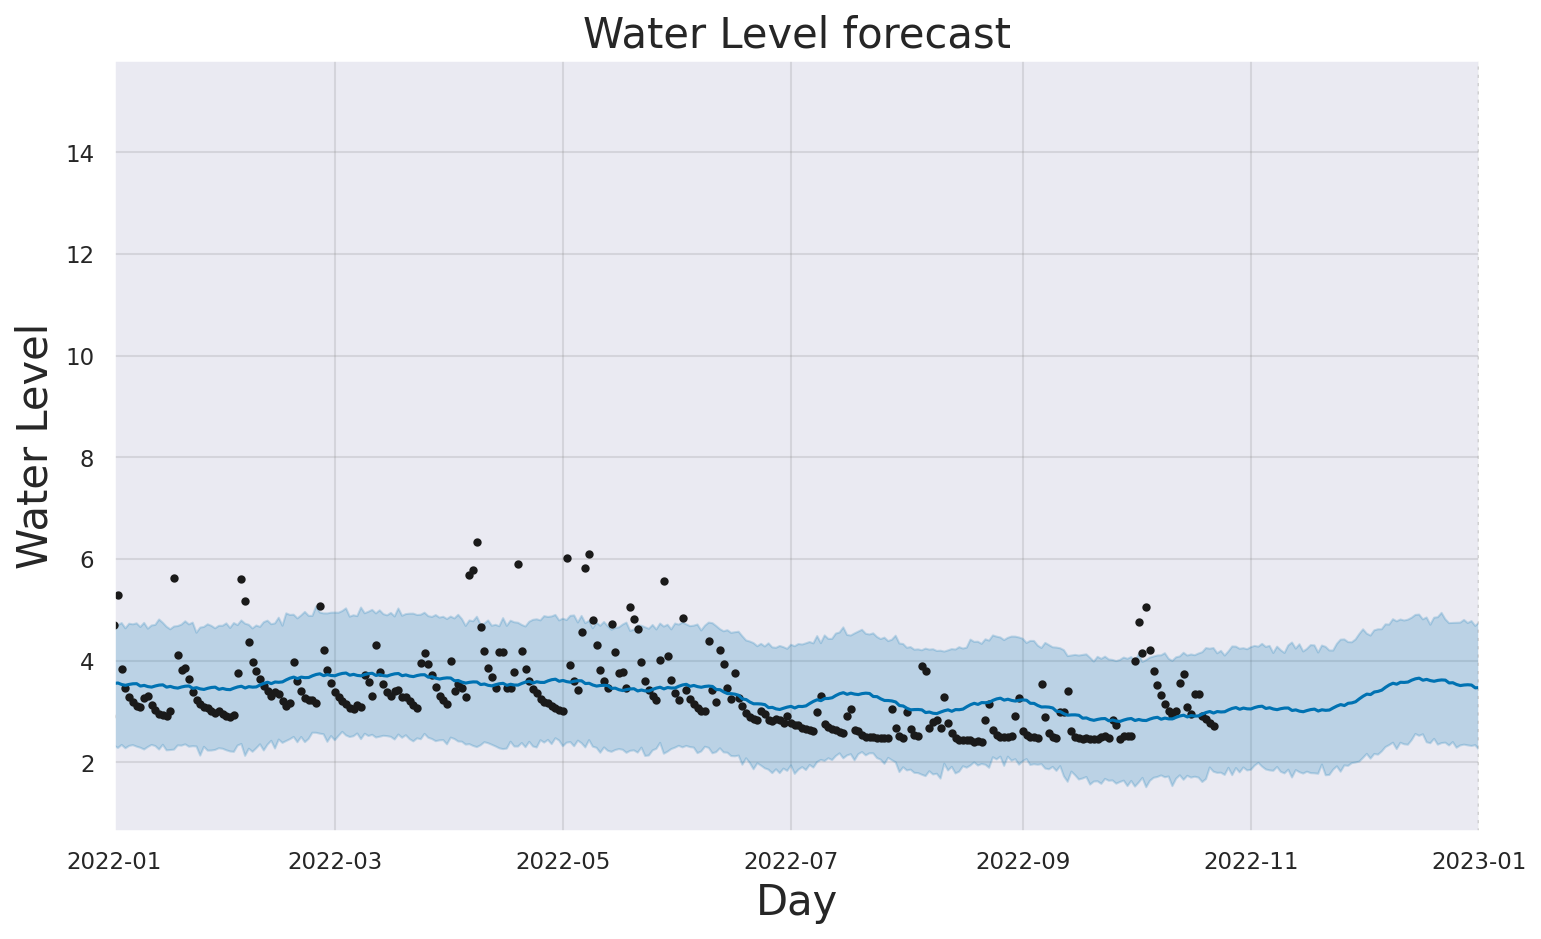

In [ ]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2023, 1, 1)
dateend = datenow + timedelta(days=0)
datestart = dateend - timedelta(days=365)

plt.xlim([datestart, dateend])
plt.title("Water Level forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Water Level", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

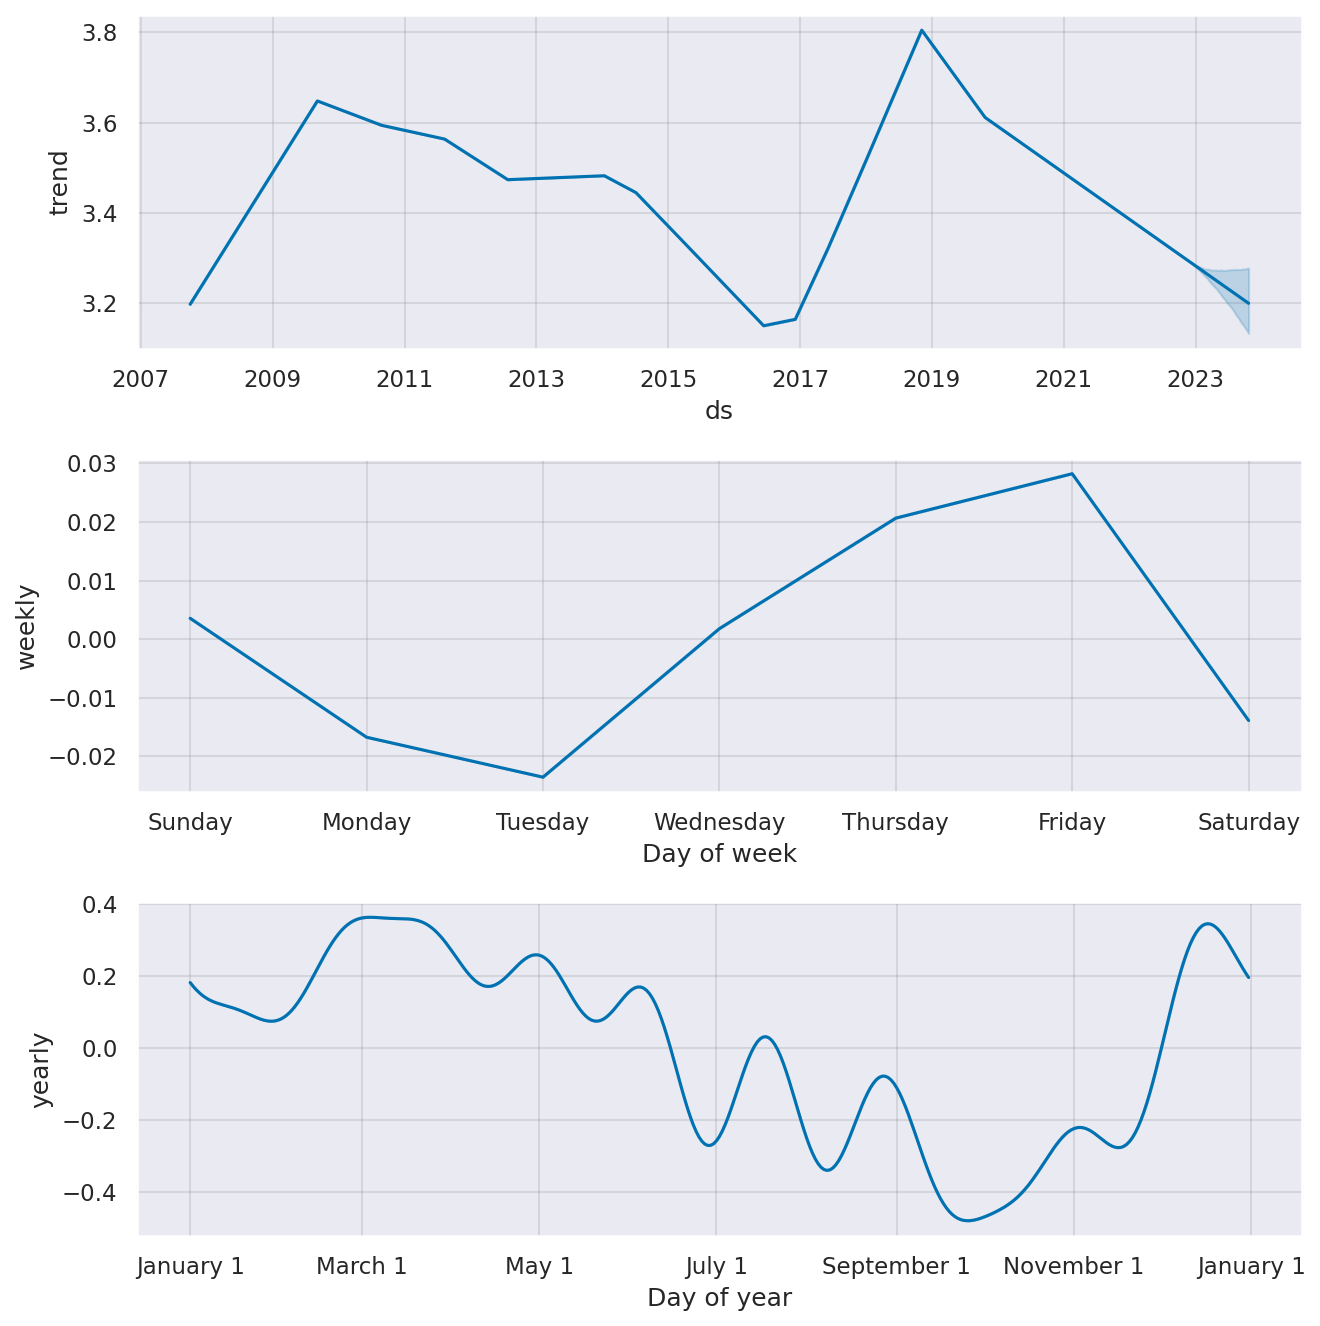

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
datenow

datetime.datetime(2023, 1, 1, 0, 0)

In [ ]:
from datetime import datetime, timedelta
datenow = datetime.now()

In [ ]:
train_size = int(0.90 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'gauge']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, [0,1]]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, [0,1]]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

4929 548


In [ ]:
import prophet
from prophet import Prophet
# Train the model
model = Prophet()

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print( 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/kr12ef5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/x6dcrg9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69919', 'data', 'file=/tmp/tmpxf5j5kkv/kr12ef5w.json', 'init=/tmp/tmpxf5j5kkv/x6dcrg9m.json', 'output', 'file=/tmp/tmpxf5j5kkv/prophet_modelk21mamkz/prophet_model-20221207154646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1.0646220873743804


-0.0563989945943002

In [ ]:
# add one regressor

In [ ]:
train_size = int(0.90 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'gauge','discharge']].copy()
univariate_df.columns = ['ds', 'y','discharge']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, [0,2]]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, [0,2]]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

4929 548


In [ ]:
train.head()

,ds,y,discharge
0,2007-10-01,2.40,23.9
1,2007-10-02,2.39,23.2
2,2007-10-03,2.39,23.2
3,2007-10-04,2.39,23.2
4,2007-10-05,2.42,25.2


In [ ]:
import prophet
from prophet import Prophet
# Train the model
model = Prophet()
model.add_regressor('discharge')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print( 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/gdp1w0x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/d4echixx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95612', 'data', 'file=/tmp/tmpxf5j5kkv/gdp1w0x5.json', 'init=/tmp/tmpxf5j5kkv/d4echixx.json', 'output', 'file=/tmp/tmpxf5j5kkv/prophet_model3vsh4shd/prophet_model-20221207151908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.26868978425214407


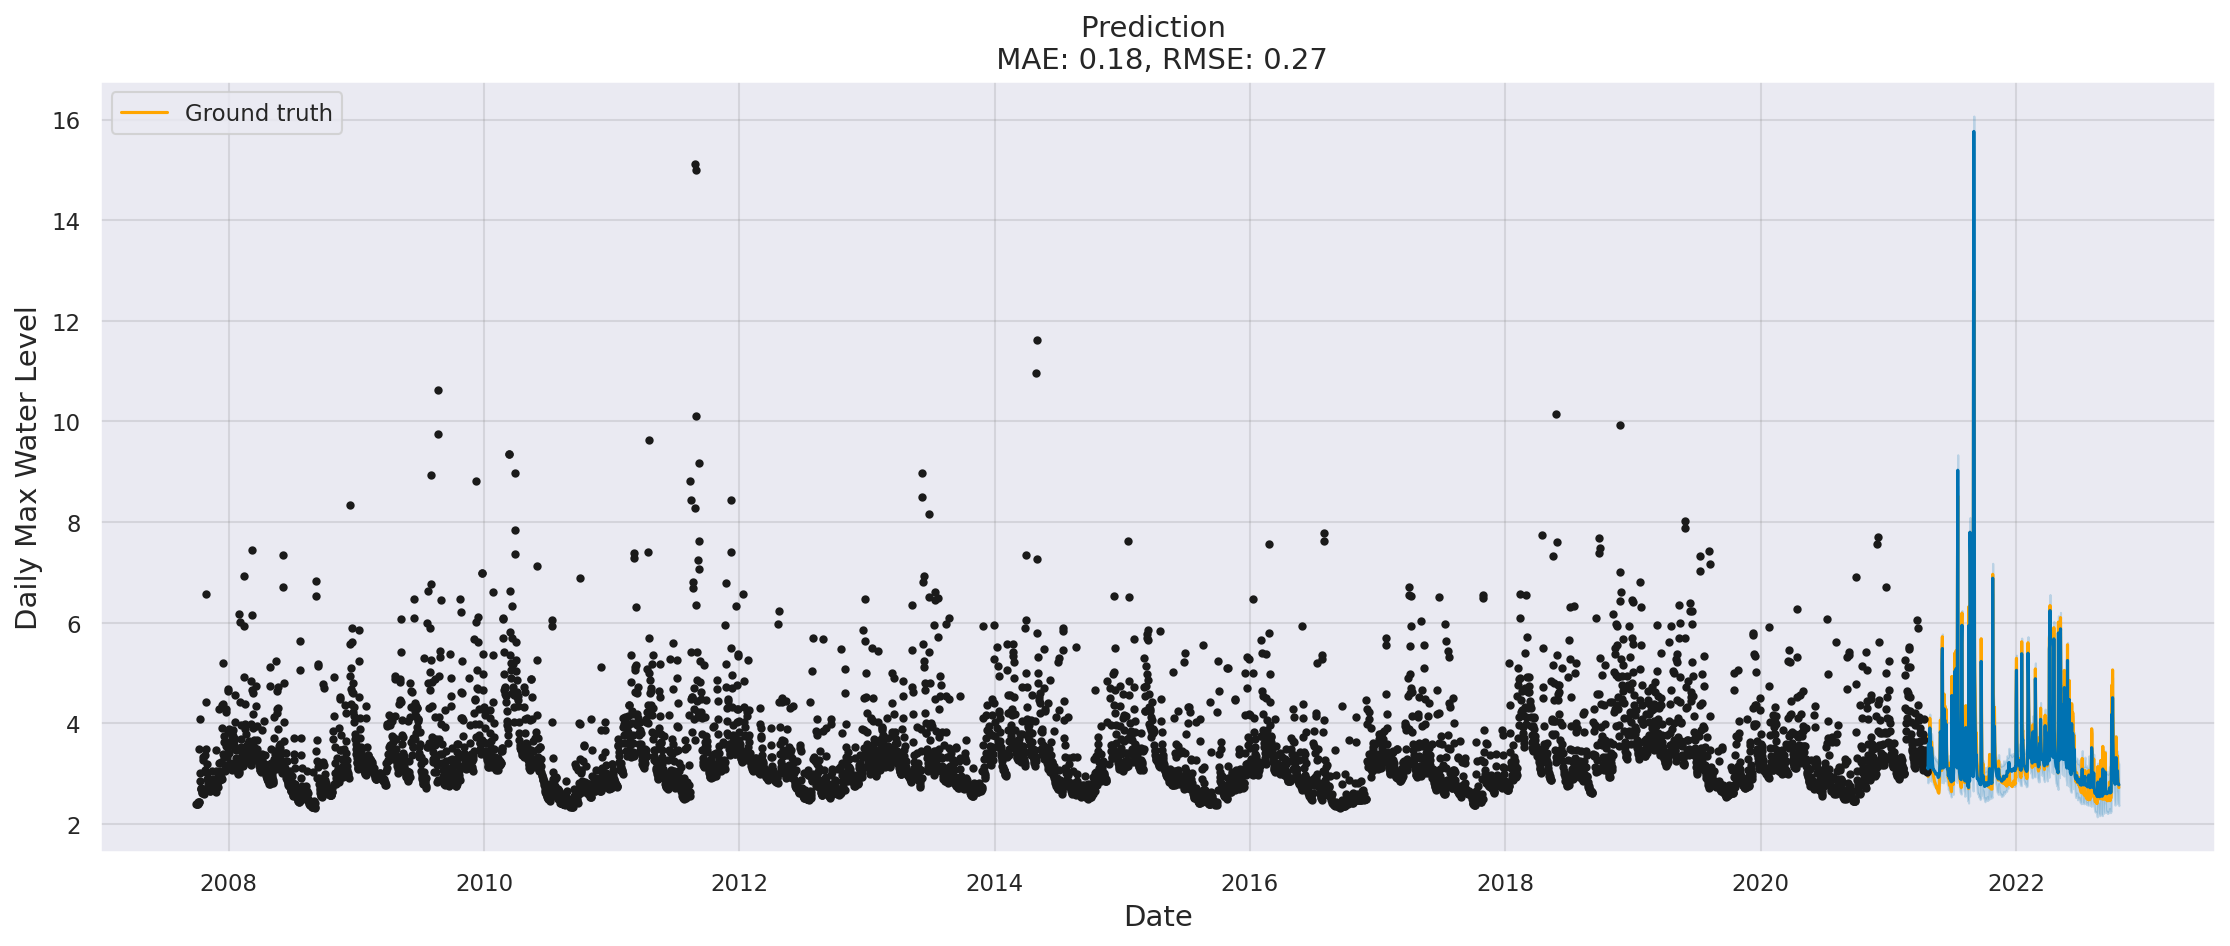

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite
model.plot(y_pred, ax=ax)
ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Daily Max Water Level', fontsize=14)

plt.show()

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_valid, y_pred['yhat'])
R_squared

0.932711732849563

In [ ]:
# add two regressors

In [ ]:
train_size = int(0.90 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'gauge','discharge','rainfall_ft']].copy()
univariate_df.columns = ['ds', 'y','discharge','rainfall']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, [0,2,3]]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, [0,2,3]]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

4929 548


In [ ]:
import prophet
from prophet import Prophet
# Train the model
model = Prophet()
model.add_regressor('discharge')
model.add_regressor('rainfall')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print( 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/m03cvhl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/3wxo4vz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28615', 'data', 'file=/tmp/tmpxf5j5kkv/m03cvhl0.json', 'init=/tmp/tmpxf5j5kkv/3wxo4vz8.json', 'output', 'file=/tmp/tmpxf5j5kkv/prophet_modelrnoyhcc4/prophet_model-20221207154146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.2593468814572141


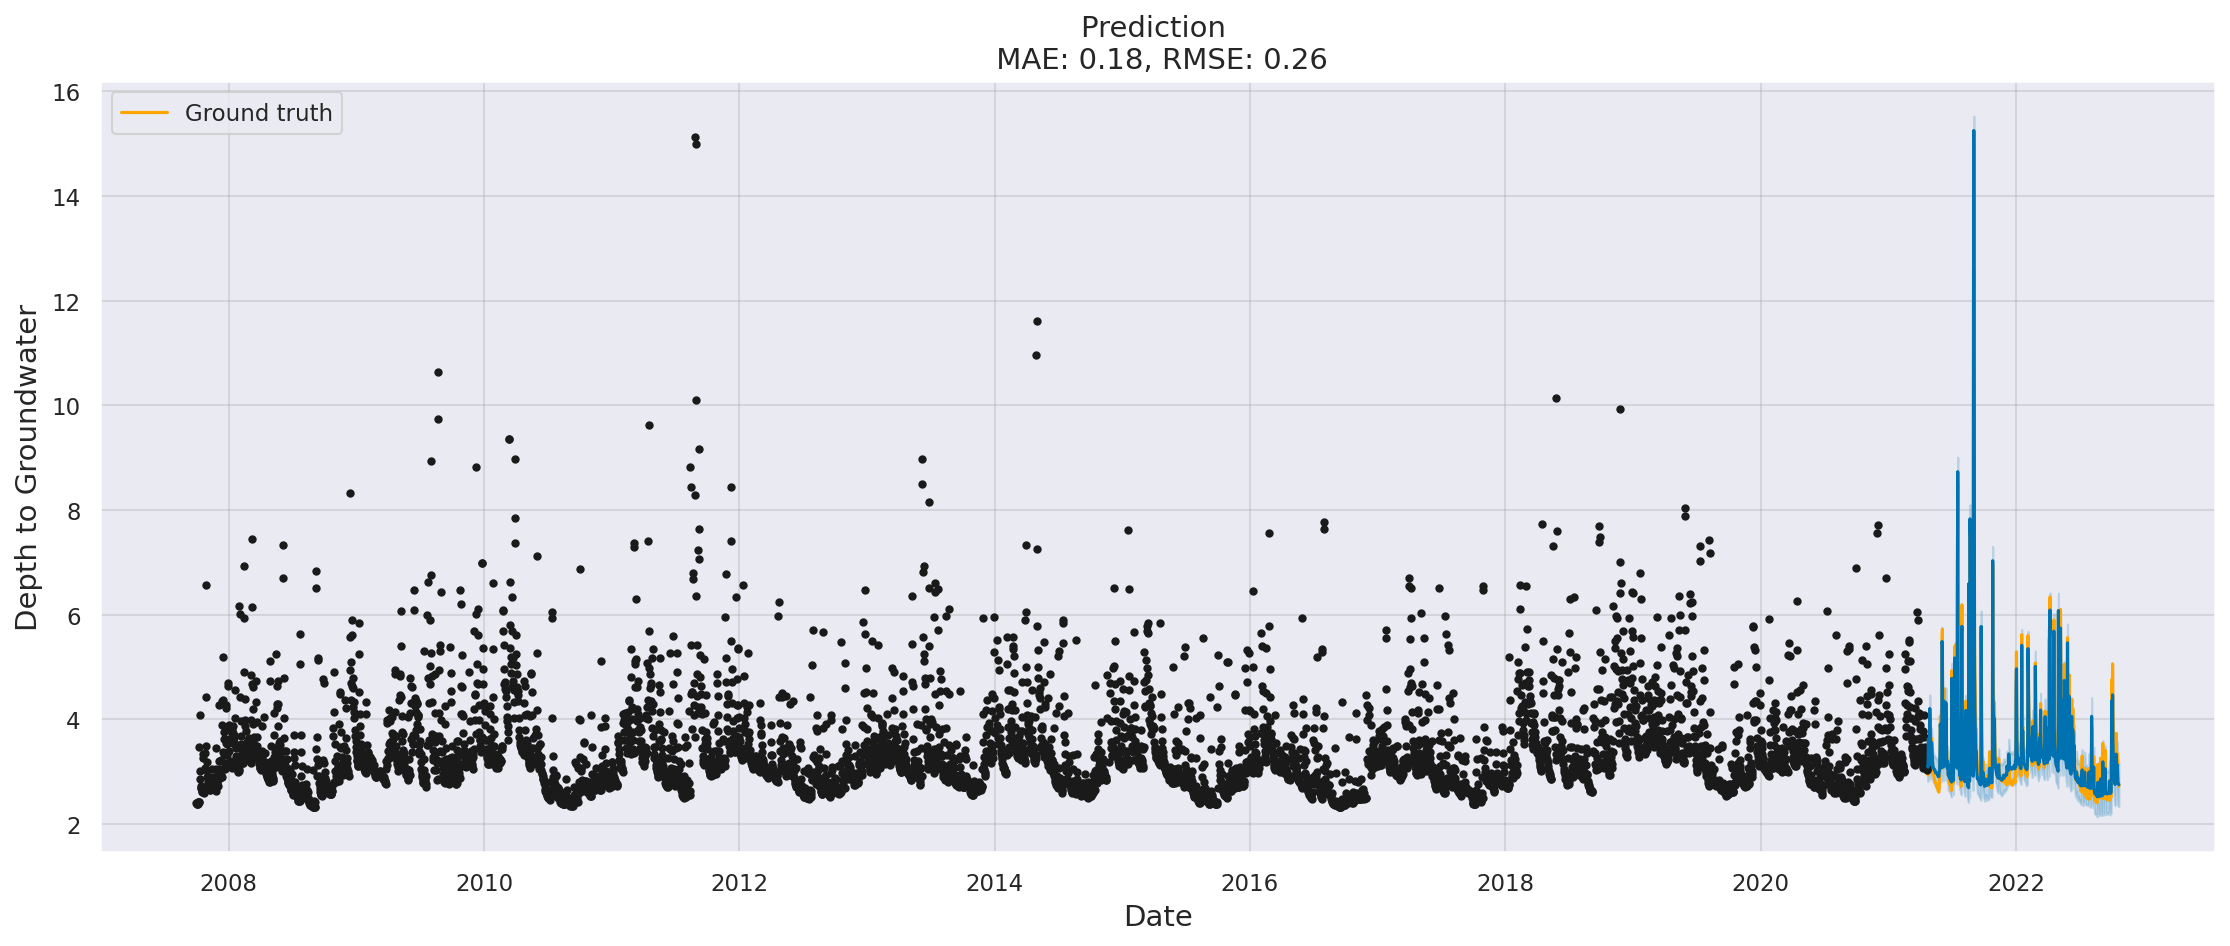

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite
model.plot(y_pred, ax=ax)
ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_valid, y_pred['yhat'])
R_squared

0.9373098808464575

In [ ]:
m = Prophet()
m.fit(univariate_df)

future = m.make_future_dataframe(periods=455)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(400)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/hfgbgj72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxf5j5kkv/eujsecfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81590', 'data', 'file=/tmp/tmpxf5j5kkv/hfgbgj72.json', 'init=/tmp/tmpxf5j5kkv/eujsecfp.json', 'output', 'file=/tmp/tmpxf5j5kkv/prophet_modelujffqihz/prophet_model-20221207173211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5532,2022-12-17,3.617088,2.347318,4.793399
5533,2022-12-18,3.633567,2.395143,4.763595
5534,2022-12-19,3.609622,2.330686,4.819831
5535,2022-12-20,3.596752,2.404546,4.784901
5536,2022-12-21,3.613923,2.255000,4.748277
...,...,...,...,...
5927,2024-01-16,3.263928,2.120674,4.421695
5928,2024-01-17,3.286411,1.959417,4.489827
5929,2024-01-18,3.302187,2.127596,4.544428
5930,2024-01-19,3.306428,2.131407,4.689595
